In [30]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os


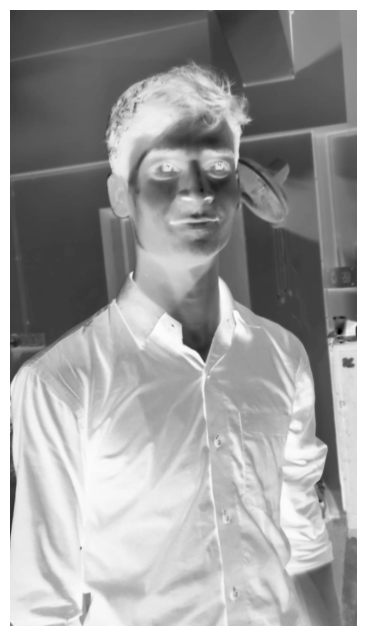

In [31]:
plt.rcParams['figure.figsize'] = [16, 8]
A = imread('rkverma.jpeg')
x = np.mean(A, -1)  # RGB to gray scale

img = plt.imshow(256-x)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# svd

In [32]:
U, S, VT = np.linalg.svd(x)

In [33]:
print(x.shape)
print(U.shape)
print(S.shape)
print(VT.shape)

(1600, 900)
(1600, 1600)
(900,)
(900, 900)


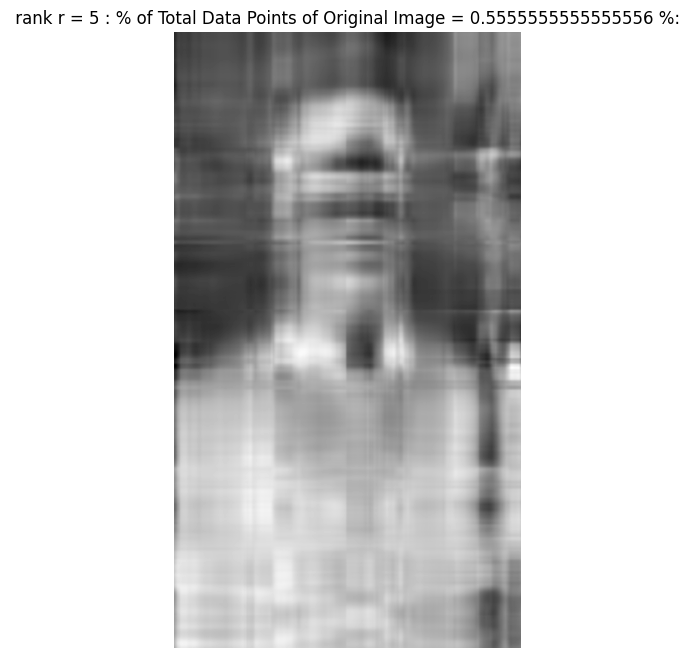

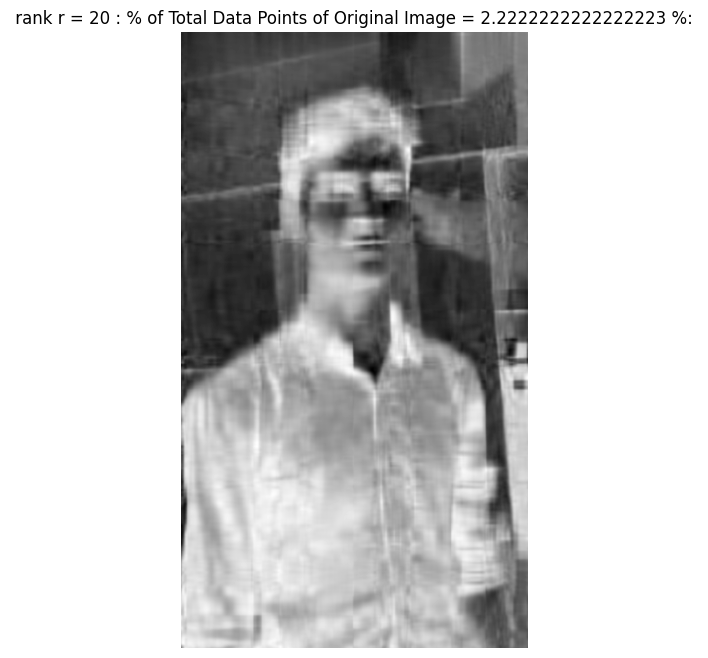

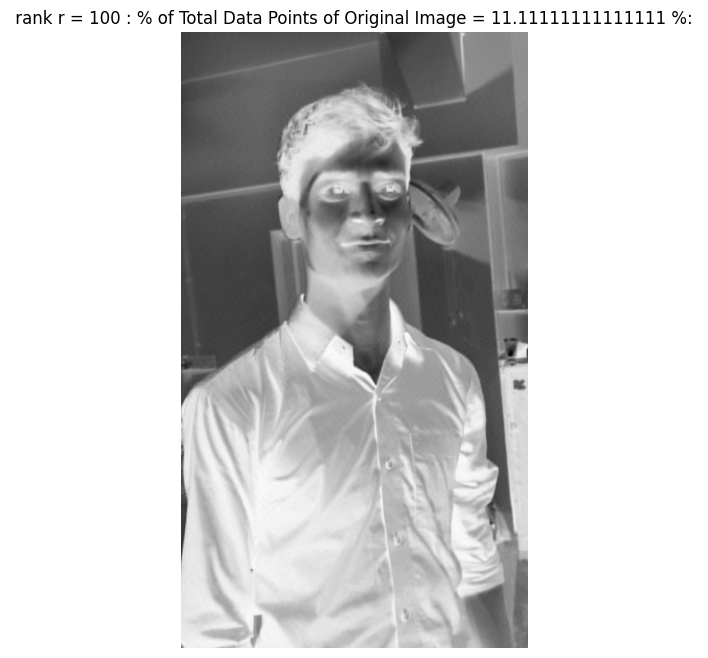

In [34]:
# 
U, S, VT = np.linalg.svd(x, full_matrices=False)
S = np.diag(S)
j = 0

for r in (5, 20, 100):
    #construct approximate image
    Xappro = U[:, :r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    img = plt.imshow(256-Xappro)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title(f" rank r = {r} : % of Total Data Points of Original Image = {(r/np.linalg.matrix_rank(x))*100} %: ")
    plt.show

# Ploting singular Values and Cummulative Sum

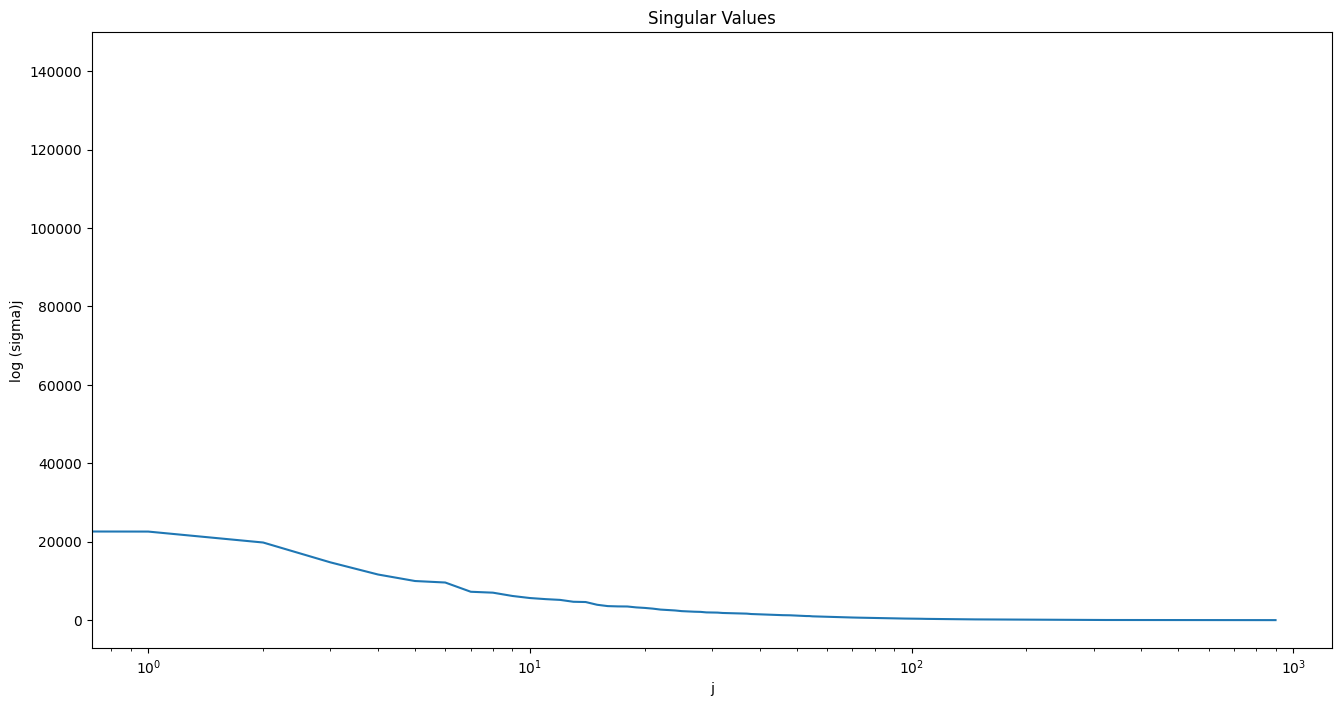

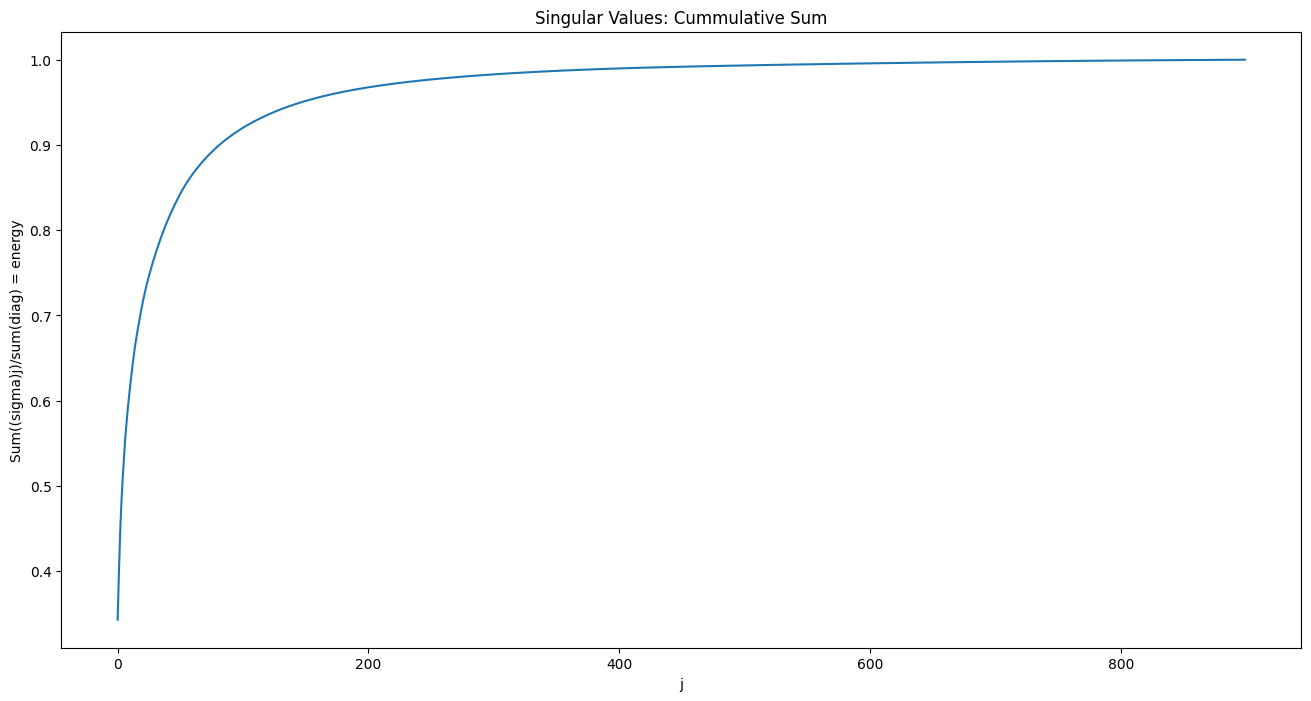

In [35]:
plt.figure(1)
plt.semilogx(np.diag(S))
plt.title('Singular Values')
plt.ylabel('log (sigma)j')
plt.xlabel('j')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cummulative Sum')
plt.ylabel('Sum((sigma)j)/sum(diag) = energy')
plt.xlabel('j')
plt.show()